In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


with open('/content/drive/MyDrive/ME781_Project/gtzan_mfcc.json', "r") as file:
    data = json.load(file) #Load MFCC dataset from JSON file

X = np.array(data["mfcc"]) #Load MFCCs 
y = np.array(data["labels"]) #Load corresponding genre names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0) #Splitting data into random training and test sets

In [ ]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny)) #Reshaping the training array 

nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny)) #Reshaping the testing array 

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
scaler = RobustScaler() #Used to scale features using statistics that are robust to outliers
scaler.fit(X_train) #Compute the median and quantiles to be used for scaling
train_sc = scaler.transform(X_train) #Fit to data, then transform it
test_sc = scaler.transform(X_test) #Fit to data, then transform it

pca = PCA(n_components =14, whiten = False) #Principal Component Analysis for dimensionality reduction
pca.fit(train_sc) #Fit the PCA model on training data

train_pca = pca.transform(train_sc) #Apply dimensionality reduction to train data
test_pca = pca.transform(test_sc) #Apply dimensionality reduction to test data

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance') #Classifier implementing the k-nearest neighbors vote
knn.fit(train_pca, y_train) #Fitting KNN classifier on training data

preds = knn.predict(train_pca) #Predicting on training data using KNN classifier
acc = accuracy_score(y_train, preds) #Calculating training accuracy
print('Train Accuracy: ',acc)
preds = knn.predict(test_pca) #Predicting on testing data using KNN classifier
acc = accuracy_score(y_test, preds) #Calculating testing accuracy
print('Test Accuracy: ',acc)

Train Accuracy:  0.9988883948421521
Test Accuracy:  0.851


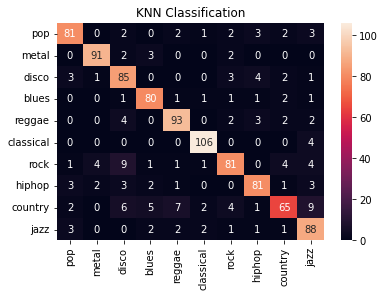

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
labelNames = ['pop','metal','disco','blues','reggae','classical','rock','hiphop','country','jazz']
matrix = confusion_matrix(y_test, preds) #Compute confusion matrix to evaluate the accuracy of a classification
sns.heatmap(matrix,annot=True,fmt='d',yticklabels=labelNames,xticklabels=labelNames) #Plot confusion matrix as heatmap
plt.title('KNN Classification');

In [ ]:
svm = SVC(C=7.0) #Initializing SVM classifier
svm.fit(train_pca, y_train) #Fitting SVM classifier on training data

preds = svm.predict(train_pca) #Predicting on training data using SVM classifier
acc = accuracy_score(y_train, preds) #Calculating training accuracy
print('Train Accuracy: ',acc)
preds = svm.predict(test_pca) #Predicting on testing data using SVM classifier
acc = accuracy_score(y_test, preds) #Calculating testing accuracy
print('Test Accuracy: ',acc)

Train Accuracy:  0.872610048910627
Test Accuracy:  0.776


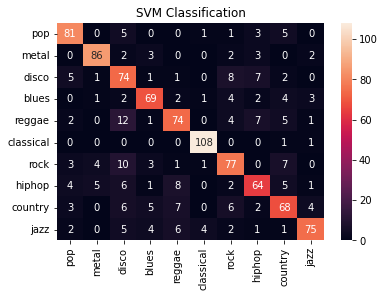

In [ ]:
matrix = confusion_matrix(y_test, preds) #Compute confusion matrix to evaluate the accuracy of a classification
sns.heatmap(matrix,annot=True,fmt='d',yticklabels=labelNames,xticklabels=labelNames) #Plot confusion matrix as heatmap
plt.title('SVM Classification');

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
} #List of hyperparamters to iterate through
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0) #Grid Search Crossvalidation for finding best hyperparameters

In [ ]:
grid_search.fit(train_pca, y_train)
grid_search.best_params_ #Printing best hyperparameters

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [ ]:
rf = RandomForestClassifier(bootstrap= True,
 max_depth= 110,
 max_features= 3,
 min_samples_leaf= 3,
 min_samples_split= 8,
 n_estimators= 1000) #Initializaing Random Forest Classifier
rf.fit(train_pca, y_train) #Fitting RF classifier on training data 

preds = rf.predict(train_pca) #Predicting on training data using RF classifier
acc = accuracy_score(y_train, preds) #Calculating training accuracy
print('Train Accuracy: ',acc)
preds = rf.predict(test_pca) #Predicting on testing data using RF classifier
acc = accuracy_score(y_test, preds) #Calculating testing accuracy
print('Test Accuracy: ',acc)

Train Accuracy:  0.9851044908848378
Test Accuracy:  0.747


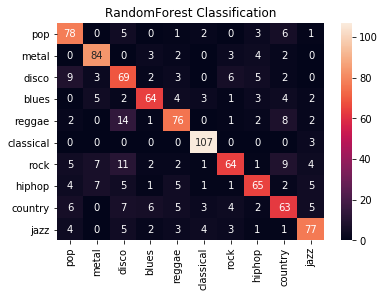

In [ ]:
matrix = confusion_matrix(y_test, preds) #Compute confusion matrix to evaluate the accuracy of a classification
sns.heatmap(matrix,annot=True,fmt='d',yticklabels=labelNames,xticklabels=labelNames) #Plot confusion matrix as heatmap
plt.title('RandomForest Classification');